# Week 9 Practice

## Black-Scholes Model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [ ]:
pip install yfinance==0.2.37  #this is the most recent version

In [17]:
pip install --upgrade pandas    #you need to upgrade pandas to use the most recent yfinance

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/61/11/1812ef6cbd7433ad240f72161ce5f84c4c450cede4db080365d371d29117/pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.6 MB 41.3 MB/s eta 0:00:01
   ---------- ----------------------------- 3.2/11.6 MB 40.6 MB/s eta 0:00:01
   ------------------ --------------------- 5.4/11.6 MB 38.4 MB/s eta 0:00:01
   ------------------------- -------------- 7.3/11.6 MB 42.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.6/11.6 MB 41.0 MB/s eta 0:00:01
   ---------------------------------------  11

###  European Options

Non-Dividend Paying Options

In [4]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [5]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [6]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

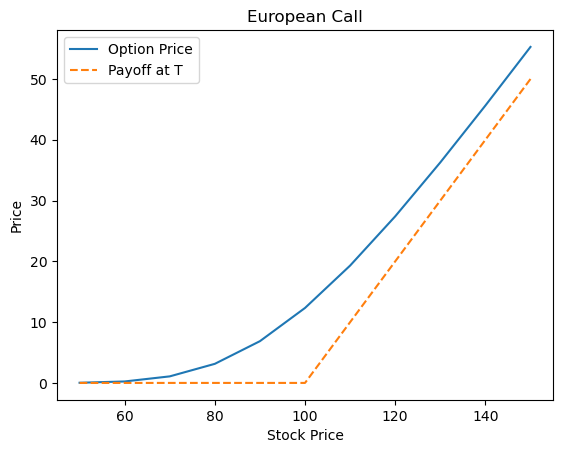

In [7]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Dividend Paying Options

In [8]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [9]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [10]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

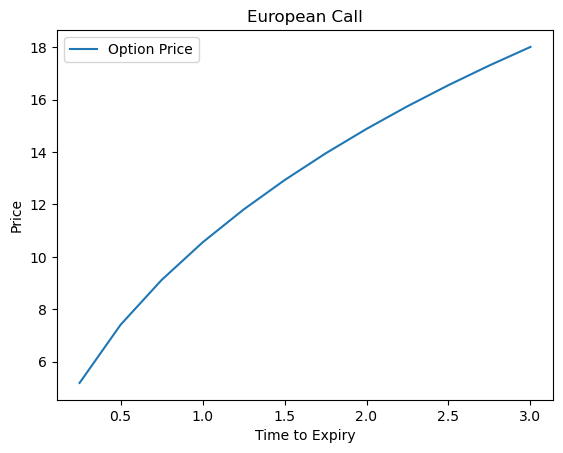

In [11]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

### Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [13]:
AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2024-03-22')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240322C00100000,2024-03-14 16:23:58+00:00,100.0,72.97,73.85,74.25,0.370003,0.509646,4,4,1.951172,True,REGULAR,USD
1,AAPL240322C00110000,2024-03-08 15:36:09+00:00,110.0,61.40,63.70,64.20,0.000000,0.000000,2,0,1.599611,True,REGULAR,USD
2,AAPL240322C00115000,2024-03-11 17:16:01+00:00,115.0,58.54,58.75,59.20,1.190002,2.074983,16,2,1.477542,True,REGULAR,USD
3,AAPL240322C00120000,2024-03-14 15:01:17+00:00,120.0,54.26,53.75,54.20,-13.090000,-19.435783,5,5,1.346683,True,REGULAR,USD
4,AAPL240322C00125000,2024-03-12 15:41:47+00:00,125.0,47.97,48.65,49.20,0.000000,0.000000,3,4,1.195317,True,REGULAR,USD
5,AAPL240322C00130000,2024-02-27 19:20:38+00:00,130.0,52.63,43.70,44.20,0.000000,0.000000,3,7,1.084966,True,REGULAR,USD
6,AAPL240322C00140000,2024-03-13 19:12:54+00:00,140.0,31.94,33.75,34.25,0.000000,0.000000,5,15,0.868165,True,REGULAR,USD
7,AAPL240322C00145000,2024-03-12 18:28:49+00:00,145.0,29.05,28.80,29.25,0.000000,0.000000,4,21,0.759768,True,REGULAR,USD
8,AAPL240322C00150000,2024-03-14 16:15:18+00:00,150.0,22.79,23.90,24.15,0.840000,3.826880,21,128,0.644047,True,REGULAR,USD
9,AAPL240322C00155000,2024-03-13 14:14:35+00:00,155.0,16.25,18.95,19.15,0.000000,0.000000,1,79,0.535161,True,REGULAR,USD


In [14]:
data = yf.download("AAPL", start="2023-03-14", end="2024-03-14")

[*********************100%%**********************]  1 of 1 completed


In [15]:
data['Adj Close']

Date
2023-03-14    151.779846
2023-03-15    152.177734
2023-03-16    155.022552
2023-03-17    154.177048
2023-03-20    156.564301
                 ...    
2024-03-07    169.000000
2024-03-08    170.729996
2024-03-11    172.750000
2024-03-12    173.229996
2024-03-13    171.130005
Name: Adj Close, Length: 252, dtype: float64

In [16]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1/52
r = 0.0382
q = 0.0061
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

C:\Users\yueya\AppData\Local\Temp\ipykernel_26300\1420688644.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S = data['Adj Close'][-1]


0.1898034254437823

In [17]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [18]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL240322C00100000,2024-03-14 16:23:58+00:00,100.0,72.97,73.85,74.25,0.370003,0.509646,4,4,1.951172,True,REGULAR,USD,71.18
1,AAPL240322C00110000,2024-03-08 15:36:09+00:00,110.0,61.40,63.70,64.20,0.000000,0.000000,2,0,1.599611,True,REGULAR,USD,61.19
2,AAPL240322C00115000,2024-03-11 17:16:01+00:00,115.0,58.54,58.75,59.20,1.190002,2.074983,16,2,1.477542,True,REGULAR,USD,56.19
3,AAPL240322C00120000,2024-03-14 15:01:17+00:00,120.0,54.26,53.75,54.20,-13.090000,-19.435783,5,5,1.346683,True,REGULAR,USD,51.20
4,AAPL240322C00125000,2024-03-12 15:41:47+00:00,125.0,47.97,48.65,49.20,0.000000,0.000000,3,4,1.195317,True,REGULAR,USD,46.20
5,AAPL240322C00130000,2024-02-27 19:20:38+00:00,130.0,52.63,43.70,44.20,0.000000,0.000000,3,7,1.084966,True,REGULAR,USD,41.21
6,AAPL240322C00140000,2024-03-13 19:12:54+00:00,140.0,31.94,33.75,34.25,0.000000,0.000000,5,15,0.868165,True,REGULAR,USD,31.21
7,AAPL240322C00145000,2024-03-12 18:28:49+00:00,145.0,29.05,28.80,29.25,0.000000,0.000000,4,21,0.759768,True,REGULAR,USD,26.22
8,AAPL240322C00150000,2024-03-14 16:15:18+00:00,150.0,22.79,23.90,24.15,0.840000,3.826880,21,128,0.644047,True,REGULAR,USD,21.22
9,AAPL240322C00155000,2024-03-13 14:14:35+00:00,155.0,16.25,18.95,19.15,0.000000,0.000000,1,79,0.535161,True,REGULAR,USD,16.22


In [19]:
opt.calls['estimate_error'] = ((opt.calls['BSMPrice'] - opt.calls['lastPrice'])/opt.calls['lastPrice'])*100
opt.calls['estimate_error']

0      -2.453063
1      -0.342020
2      -4.014349
3      -5.639513
4      -3.689806
5     -21.698651
6      -2.285535
7      -9.741824
8      -6.888986
9      -0.184615
10    -17.289157
11    -20.071174
12    -25.042735
13    -30.918919
14    -37.702504
15    -49.591837
16    -59.344262
17    -70.285714
18    -80.219780
19    -89.130435
20    -95.454545
21   -100.000000
22   -100.000000
23   -100.000000
24   -100.000000
25   -100.000000
26   -100.000000
27   -100.000000
28   -100.000000
29   -100.000000
30   -100.000000
31   -100.000000
32   -100.000000
33   -100.000000
34   -100.000000
35   -100.000000
36   -100.000000
37   -100.000000
38   -100.000000
39   -100.000000
Name: estimate_error, dtype: float64

In [20]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     40.000000
mean     -63.299736
std       41.918851
min     -100.000000
25%     -100.000000
50%      -92.292490
75%      -19.375670
max       -0.184615
Name: estimate_error, dtype: float64

Our mean estimation error is -19.76%, with a standard deviation of 72.9% points. Our median is even more promising at around -3.85%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

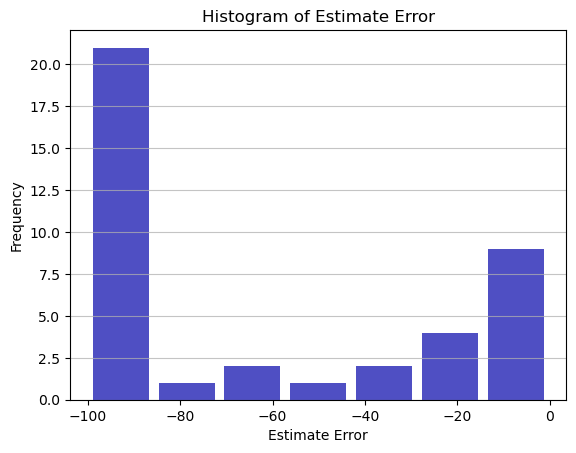

In [21]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

### Mibian - Options Pricing Library

MibianLib is an open source python library for options pricing. You can use it to calculate the price, the implied volatility, the greeks or the put/call parity of an option using the Black-Scholes(-Merton) pricing models.

In [22]:
pip install mibian

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import mibian as mb

In [24]:
option_100 = mb.BS([S, 150, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [25]:
option_100.callPrice

21.618798849960854

In [26]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 7], volatility = vol*100).callPrice

In [27]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL240322C00100000,2024-03-14 16:23:58+00:00,100.0,72.97,73.85,74.25,0.370003,0.509646,4,4,1.951172,True,REGULAR,USD,71.18,-2.453063,71.19
1,AAPL240322C00110000,2024-03-08 15:36:09+00:00,110.0,61.40,63.70,64.20,0.000000,0.000000,2,0,1.599611,True,REGULAR,USD,61.19,-0.342020,61.20
2,AAPL240322C00115000,2024-03-11 17:16:01+00:00,115.0,58.54,58.75,59.20,1.190002,2.074983,16,2,1.477542,True,REGULAR,USD,56.19,-4.014349,56.20
3,AAPL240322C00120000,2024-03-14 15:01:17+00:00,120.0,54.26,53.75,54.20,-13.090000,-19.435783,5,5,1.346683,True,REGULAR,USD,51.20,-5.639513,51.21
4,AAPL240322C00125000,2024-03-12 15:41:47+00:00,125.0,47.97,48.65,49.20,0.000000,0.000000,3,4,1.195317,True,REGULAR,USD,46.20,-3.689806,46.21
5,AAPL240322C00130000,2024-02-27 19:20:38+00:00,130.0,52.63,43.70,44.20,0.000000,0.000000,3,7,1.084966,True,REGULAR,USD,41.21,-21.698651,41.21
6,AAPL240322C00140000,2024-03-13 19:12:54+00:00,140.0,31.94,33.75,34.25,0.000000,0.000000,5,15,0.868165,True,REGULAR,USD,31.21,-2.285535,31.22
7,AAPL240322C00145000,2024-03-12 18:28:49+00:00,145.0,29.05,28.80,29.25,0.000000,0.000000,4,21,0.759768,True,REGULAR,USD,26.22,-9.741824,26.22
8,AAPL240322C00150000,2024-03-14 16:15:18+00:00,150.0,22.79,23.90,24.15,0.840000,3.826880,21,128,0.644047,True,REGULAR,USD,21.22,-6.888986,21.23
9,AAPL240322C00155000,2024-03-13 14:14:35+00:00,155.0,16.25,18.95,19.15,0.000000,0.000000,1,79,0.535161,True,REGULAR,USD,16.22,-0.184615,16.23


In [28]:
opt.calls['estimate_error_mb'] = ((opt.calls['MB_BSMPrice'] - opt.calls['lastPrice'] )/opt.calls['lastPrice'] )*100
opt.calls['estimate_error_mb']

0      -2.439359
1      -0.325733
2      -3.997267
3      -5.621084
4      -3.668960
5     -21.698651
6      -2.254227
7      -9.741824
8      -6.845108
9      -0.123077
10    -17.289157
11    -20.000000
12    -24.957265
13    -30.810811
14    -37.555228
15    -49.387755
16    -59.344262
17    -70.285714
18    -80.219780
19    -89.130435
20    -95.454545
21   -100.000000
22   -100.000000
23   -100.000000
24   -100.000000
25   -100.000000
26   -100.000000
27   -100.000000
28   -100.000000
29   -100.000000
30   -100.000000
31   -100.000000
32   -100.000000
33   -100.000000
34   -100.000000
35   -100.000000
36   -100.000000
37   -100.000000
38   -100.000000
39   -100.000000
Name: estimate_error_mb, dtype: float64

In [29]:
opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     40.000000
mean     -63.278756
std       41.937136
min     -100.000000
25%     -100.000000
50%      -92.292490
75%      -19.322289
max       -0.123077
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

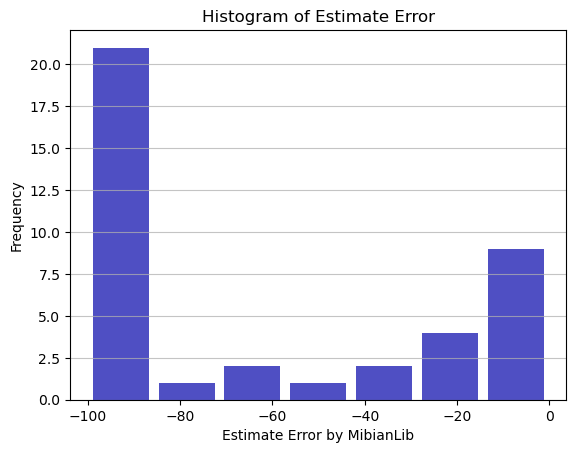

In [30]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

The mean, median, and the standard deviation are quite similar to what we calculated.